In [1]:
import meep as mp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

Using MPI version 4.1, 1 processes


In [2]:
# ___________________________________________________________________________
# Important Parameters

plt.rcParams['figure.dpi'] = 1200

frames = [] # Image storage

inf = mp.inf

# Media

mediumIndex = 4
backgroundIndex = 1.44

medium= mp.Medium(index=mediumIndex)
background = mp.Medium(index=backgroundIndex)

# PML

thicknessPML = 3.0 # PML Thickess
pml_layers = [mp.PML(thicknessPML)]




In [3]:
# _______________________________________________________________________________________________
# A number of utility functions, supplied from https://humaticlabs.com/blog/meep-double-slit/, by Robert Taylor, but edited for gathering of data in pyplot.

# Label Plot
def label_plot(ax, title=None, xlabel=None, ylabel=None, elapsed=None):
    if title:
        ax.set_title(title)
    elif elapsed is not None:
        ax.set_title(f'{elapsed:0.1f} fs')
    if xlabel is not False:
        ax.set_xlabel('x (μm)'if xlabel is None else xlabel)
    if ylabel is not False:
        ax.set_ylabel('y (μm)'if ylabel is None else ylabel)

# Plot data of dielectric
def plot_eps_data(eps_data, domain, ax=None, **kwargs):
    ax = ax or plt.gca()
    label_plot(ax, **kwargs)
    return ax.imshow(eps_data.T, cmap='binary', extent=domain, origin='lower')

# Plot complex vectored E field data amplitude
def plot_ez_data(ez_data, domain, ax=None, vmax=None, aspect=None, **kwargs):
    ax = ax or plt.gca()
    label_plot(ax, **kwargs)
    return ax.imshow(
        np.abs(ez_data.T),
        interpolation='spline36',
        cmap='coolwarm',
        extent=domain,
        vmax=vmax,
        aspect=aspect,
        origin='lower',
        alpha=0.9
        )

# Define perfectly matched layers (border)
def plot_pml(pml_thickness, domain, ax=None):
    ax = ax or plt.gca()
    x_start = domain[0] + pml_thickness
    x_end = domain[1] - pml_thickness
    y_start = domain[2] + pml_thickness
    y_end = domain[3] - pml_thickness
    rect = plt.Rectangle(
        (x_start, y_start),
        x_end - x_start,
        y_end - y_start,
        fill=None,
        color='#000',
        linestyle='dashed',
        )
    return ax.add_patch(rect)

def plotData(eps_data,ez_data):
    frame = []
    ax = plt.gca()
    frame.append(plot_eps_data(eps_data, domain, ax=ax))
    frame.append(plot_ez_data(ez_data, domain, ax=ax))
    frame.append(plot_pml(thicknessPML, domain, ax=ax))
    return frame
    

def plotEPS(Sim, todo):
    if todo == 'step':
        eps_data = Sim.get_array(center=mp.Vector3(), size=cellSize, component=mp.Dielectric)
        ez_data = Sim.get_array(center=mp.Vector3(), size=cellSize, component=mp.Ez)
        frame = plotData(eps_data,ez_data)
        frames.append(frame)
        fig, ax = plt.subplots()
        ax = frame
        fig

# _______________________________________________________________________________________________

0.1
     block, center = (0,13.04,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


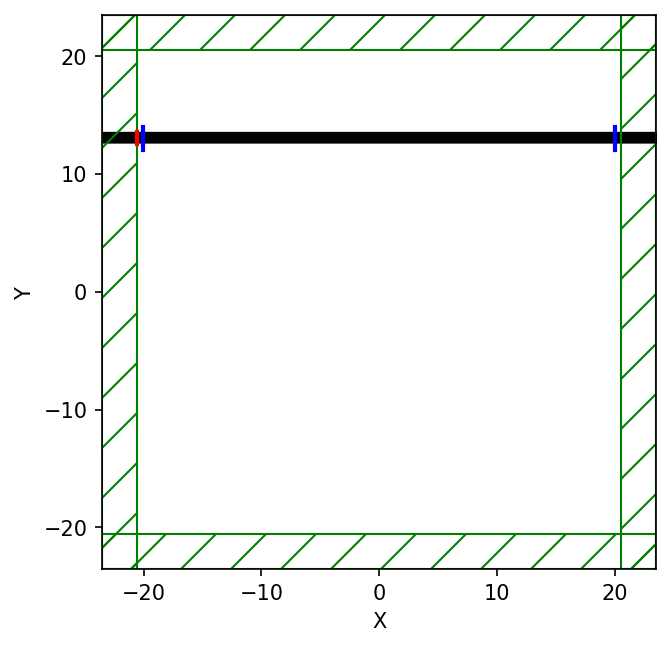

-----------
Initializing structure...
time for choose_chunkdivision = 0.0004275 s
Working in 2D dimensions.
Computational cell is 47.1 x 47.1 x 0 with resolution 10
     block, center = (0,13.04,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.182421 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 225.85000000000002/2500.0 = 9.0% done in 4.0s, 40.3s to go
on time step 4520 (time=226), 0.000885021 s/step
Meep progress: 447.25/2500.0 = 17.9% done in 8.0s, 36.7s to go
on time step 8948 (time=447.4), 0.000903425 s/step
Meep progress: 670.35/2500.0 = 26.8% done in 12.0s, 32.8s to go
on time step 13410 (time=670.5), 0.000896514 s/step
Meep progress: 801.35/2500.0 = 32.1% done in 16.0s, 33.9s to go
on time step 16028 (time=801.4), 0.0015279 s/step
Meep progress: 1020.5/2500.0 = 40.8% done in 20.0s, 29.0s to go
on time step 20413 (time=1020.65), 0.000912202 s/step
Meep progress: 1260.75/2500.0 = 50.4% done in 24.0s, 23.6s to go
on time step 25220 (time=1261), 0.000832183 s/step
Meep progress: 1503.8000000000002/2500.0 = 60.2% done in 28.0s, 18.6s to go
on time step 30082 (time=1504.1), 0.000822748 s/step
Meep progress: 1723.5500000000002/2500.0 = 68.9% done in 32.0s, 14.4s to go
on time step 34476 (time=1723.8), 0.00091041 s/step
Meep progress: 1911.45/2500.0 = 76.5% done

run 0 finished at t = 2500.0 (50000 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.0002591 s
Working in 2D dimensions.
Computational cell is 47.1 x 47.1 x 0 with resolution 10
     block, center = (0,13.04,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,-6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,-6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     bloc

FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 193.55/2500.0 = 7.7% done in 4.0s, 47.7s to go
on time step 3877 (time=193.85), 0.00103197 s/step
Meep progress: 431.85/2500.0 = 17.3% done in 8.0s, 38.3s to go
on time step 8644 (time=432.2), 0.000839151 s/step
Meep progress: 677.2/2500.0 = 27.1% done in 12.0s, 32.3s to go
on time step 13552 (time=677.6), 0.000815121 s/step
Meep progress: 911.45/2500.0 = 36.5% done in 16.0s, 27.9s to go
on time step 18239 (time=911.95), 0.000853586 s/step
Meep progress: 1148.2/2500.0 = 45.9% done in 20.0s, 23.5s to go
on time step 22970 (time=1148.5), 0.000845507 s/step
Meep progress: 1345.0/2500.0 = 53.8% done in 24.0s, 20.6s to go
on time step 26911 (time=1345.55), 0.00101508 s/step
Meep progress: 1558.75/2500.0 = 62.4% done in 28.0s, 16.9s to go
on time step 31188 (time=1559.4), 0.000935456 s/step
Meep progress: 1793.65/2500.0 = 71.7% done in 32.0s, 12.6s to go
on time step 35884 (time=1794.2), 0.000851795 s/step
Meep progress: 2054.0/2500.0 = 82.2% done in 36.0s, 7.8s to go
on time 

run 0 finished at t = 2500.0 (50000 timesteps)
     block, center = (0,13.04,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,-6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,-6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-13.04,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


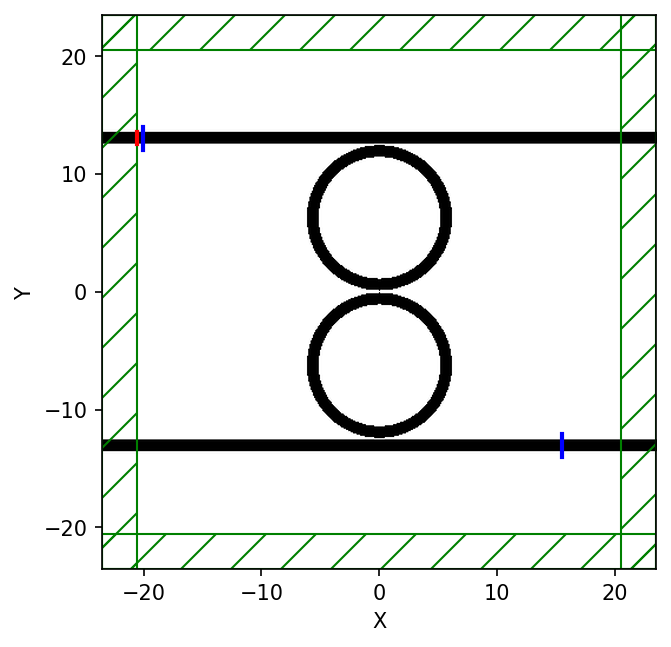

0.2
     block, center = (0,13.14,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


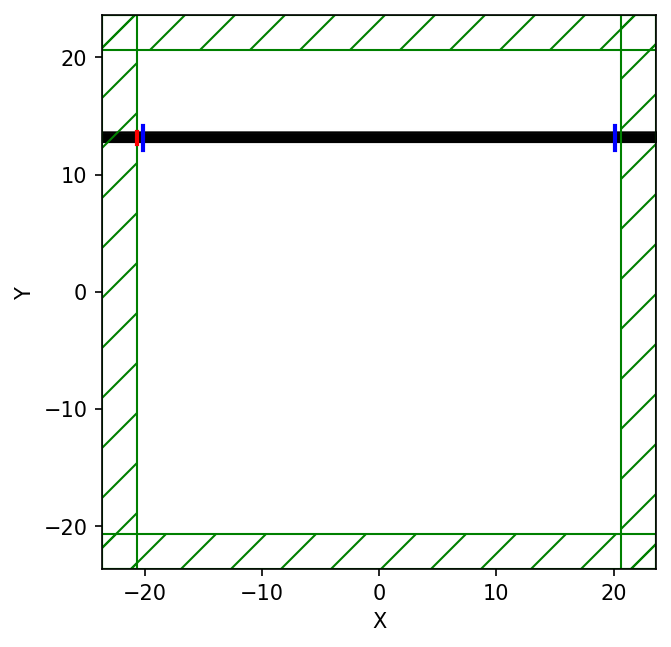

-----------
Initializing structure...
time for choose_chunkdivision = 0.0002124 s
Working in 2D dimensions.
Computational cell is 47.3 x 47.3 x 0 with resolution 10
     block, center = (0,13.14,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.203946 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 185.70000000000002/2500.0 = 7.4% done in 4.0s, 49.9s to go
on time step 3719 (time=185.95), 0.00107563 s/step
Meep progress: 412.75/2500.0 = 16.5% done in 8.0s, 40.5s to go
on time step 8260 (time=413), 0.000880948 s/step
Meep progress: 600.1/2500.0 = 24.0% done in 12.0s, 38.0s to go
on time step 12004 (time=600.2), 0.00106855 s/step
Meep progress: 811.1500000000001/2500.0 = 32.4% done in 16.0s, 33.3s to go
on time step 16229 (time=811.45), 0.000946987 s/step
Meep progress: 1034.8500000000001/2500.0 = 41.4% done in 20.0s, 28.3s to go
on time step 20700 (time=1035), 0.000895203 s/step
Meep progress: 1213.1000000000001/2500.0 = 48.5% done in 24.0s, 25.5s to go
on time step 24265 (time=1213.25), 0.00112221 s/step
Meep progress: 1373.9/2500.0 = 55.0% done in 28.0s, 23.0s to go
on time step 27482 (time=1374.1), 0.00124364 s/step
Meep progress: 1550.9/2500.0 = 62.0% done in 32.0s, 19.6s to go
on time step 31021 (time=1551.05), 0.00113055 s/step
Meep progress: 1724.350000000000

run 0 finished at t = 2500.0 (50000 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.0002361 s
Working in 2D dimensions.
Computational cell is 47.3 x 47.3 x 0 with resolution 10
     block, center = (0,13.14,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,-6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,-6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     bloc

FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 202.5/2500.0 = 8.1% done in 4.0s, 45.4s to go
on time step 4054 (time=202.7), 0.000986749 s/step
Meep progress: 432.0/2500.0 = 17.3% done in 8.0s, 38.3s to go
on time step 8643 (time=432.15), 0.000872015 s/step
Meep progress: 636.6/2500.0 = 25.5% done in 12.0s, 35.1s to go
on time step 12737 (time=636.85), 0.000977136 s/step
Meep progress: 801.95/2500.0 = 32.1% done in 16.0s, 33.9s to go
on time step 16044 (time=802.2), 0.00120956 s/step
Meep progress: 1014.8000000000001/2500.0 = 40.6% done in 20.0s, 29.3s to go
on time step 20302 (time=1015.1), 0.000939428 s/step
Meep progress: 1208.7/2500.0 = 48.3% done in 24.0s, 25.6s to go
on time step 24180 (time=1209), 0.00103148 s/step
Meep progress: 1407.75/2500.0 = 56.3% done in 28.0s, 21.7s to go
on time step 28160 (time=1408), 0.0010054 s/step
Meep progress: 1609.3000000000002/2500.0 = 64.4% done in 32.0s, 17.7s to go
on time step 32196 (time=1609.8), 0.000991324 s/step
Meep progress: 1807.15/2500.0 = 72.3% done in 36.0s, 13.8

run 0 finished at t = 2500.0 (50000 timesteps)
     block, center = (0,13.14,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,-6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,-6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-13.14,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


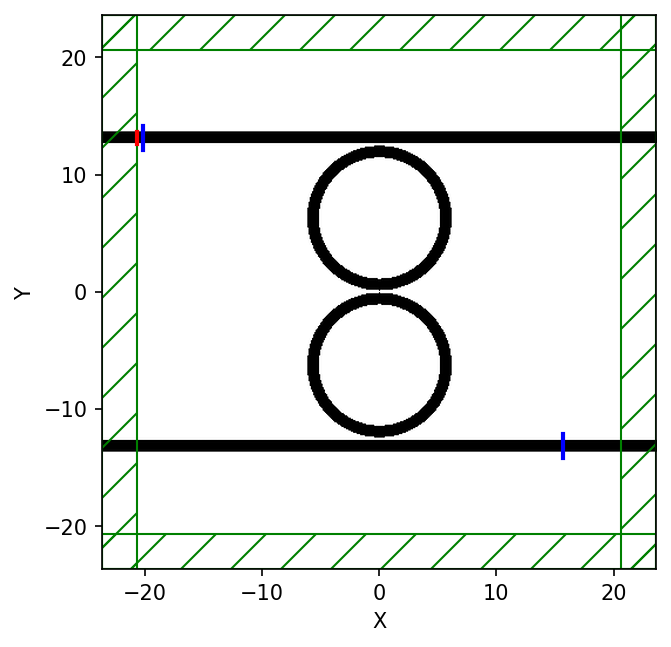

0.3
     block, center = (0,13.24,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


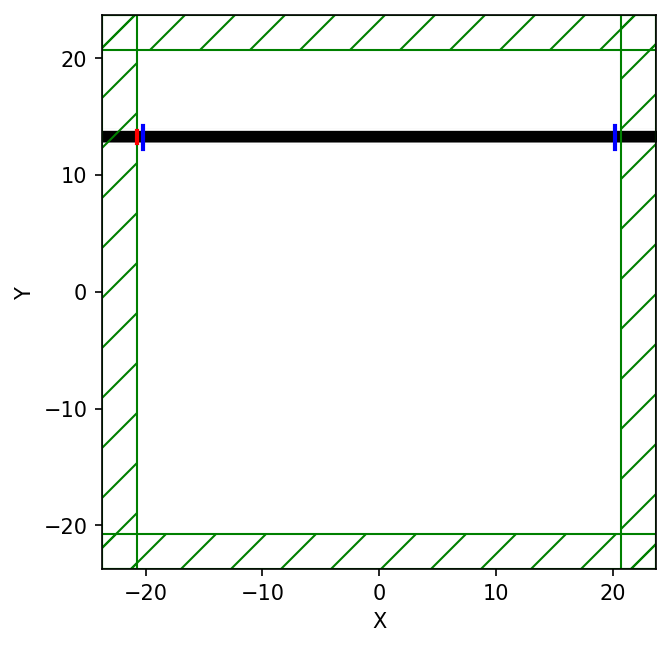

-----------
Initializing structure...
time for choose_chunkdivision = 0.0002127 s
Working in 2D dimensions.
Computational cell is 47.5 x 47.5 x 0 with resolution 10
     block, center = (0,13.24,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.186118 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 213.25/2500.0 = 8.5% done in 4.0s, 42.9s to go
on time step 4269 (time=213.45), 0.000937137 s/step
Meep progress: 418.40000000000003/2500.0 = 16.7% done in 8.0s, 39.8s to go
on time step 8371 (time=418.55), 0.000975279 s/step
Meep progress: 588.7/2500.0 = 23.5% done in 12.0s, 39.0s to go
on time step 11777 (time=588.85), 0.00117458 s/step
Meep progress: 779.3000000000001/2500.0 = 31.2% done in 16.0s, 35.3s to go
on time step 15587 (time=779.35), 0.00104997 s/step
Meep progress: 921.6500000000001/2500.0 = 36.9% done in 20.0s, 34.3s to go
on time step 18436 (time=921.8), 0.00140455 s/step
Meep progress: 1118.3/2500.0 = 44.7% done in 24.0s, 29.7s to go
on time step 22374 (time=1118.7), 0.00101579 s/step
Meep progress: 1297.95/2500.0 = 51.9% done in 28.0s, 25.9s to go
on time step 25964 (time=1298.2), 0.0011145 s/step
Meep progress: 1485.15/2500.0 = 59.4% done in 32.0s, 21.9s to go
on time step 29711 (time=1485.55), 0.00106773 s/step
Meep progress: 1685.6000000000001/2500.0 

run 0 finished at t = 2500.0 (50000 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.0002938 s
Working in 2D dimensions.
Computational cell is 47.5 x 47.5 x 0 with resolution 10
     block, center = (0,13.24,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,-6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,-6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     bloc

FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 217.20000000000002/2500.0 = 8.7% done in 4.0s, 42.0s to go
on time step 4350 (time=217.5), 0.000919781 s/step
Meep progress: 452.15000000000003/2500.0 = 18.1% done in 8.0s, 36.2s to go
on time step 9050 (time=452.5), 0.000851188 s/step
Meep progress: 656.4000000000001/2500.0 = 26.3% done in 12.0s, 33.7s to go
on time step 13136 (time=656.8), 0.000979157 s/step
Meep progress: 862.45/2500.0 = 34.5% done in 16.0s, 30.4s to go
on time step 17258 (time=862.9), 0.000970621 s/step
Meep progress: 1096.3500000000001/2500.0 = 43.9% done in 20.0s, 25.6s to go
on time step 21936 (time=1096.8), 0.000855243 s/step
Meep progress: 1325.1000000000001/2500.0 = 53.0% done in 24.0s, 21.3s to go
on time step 26515 (time=1325.75), 0.000873637 s/step
Meep progress: 1552.8500000000001/2500.0 = 62.1% done in 28.0s, 17.1s to go
on time step 31067 (time=1553.35), 0.00087879 s/step
Meep progress: 1765.0/2500.0 = 70.6% done in 32.0s, 13.3s to go
on time step 35310 (time=1765.5), 0.000942795 s/step
M

run 0 finished at t = 2500.0 (50000 timesteps)
     block, center = (0,13.24,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,-6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,-6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-13.24,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


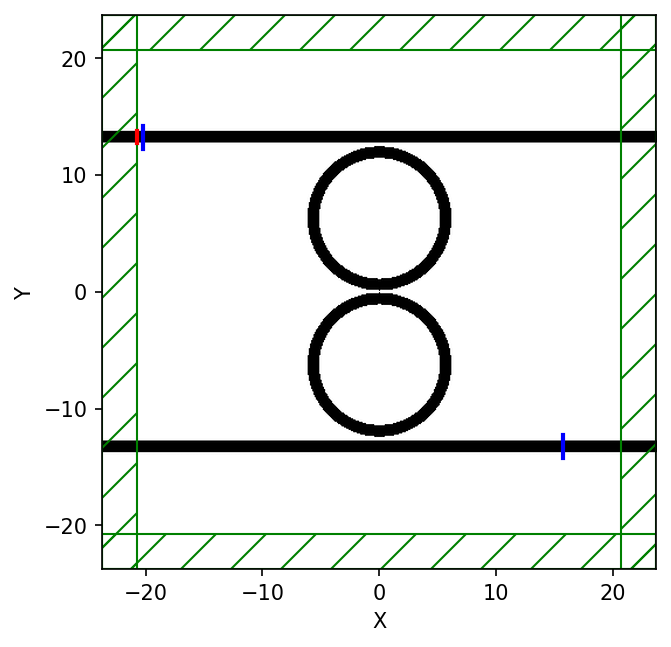

0.4
     block, center = (0,13.34,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


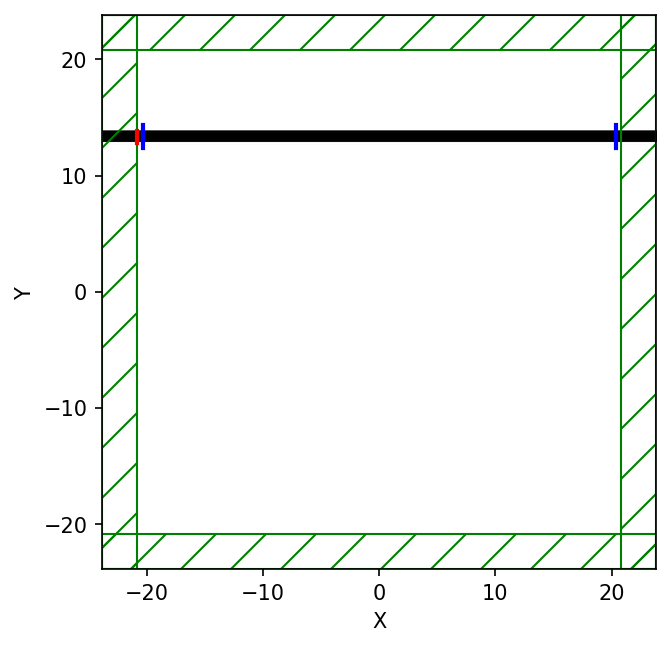

-----------
Initializing structure...
time for choose_chunkdivision = 0.000216 s
Working in 2D dimensions.
Computational cell is 47.7 x 47.7 x 0 with resolution 10
     block, center = (0,13.34,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.189207 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 208.35000000000002/2500.0 = 8.3% done in 4.0s, 44.0s to go
on time step 4170 (time=208.5), 0.00095943 s/step
Meep progress: 360.20000000000005/2500.0 = 14.4% done in 8.0s, 47.5s to go
on time step 7207 (time=360.35), 0.00131714 s/step
Meep progress: 570.6/2500.0 = 22.8% done in 12.0s, 40.6s to go
on time step 11417 (time=570.85), 0.000950183 s/step
Meep progress: 788.3000000000001/2500.0 = 31.5% done in 16.0s, 34.7s to go
on time step 15772 (time=788.6), 0.000918601 s/step
Meep progress: 1013.9000000000001/2500.0 = 40.6% done in 20.0s, 29.3s to go
on time step 20284 (time=1014.2), 0.000886647 s/step
Meep progress: 1237.8000000000002/2500.0 = 49.5% done in 24.0s, 24.5s to go
on time step 24763 (time=1238.15), 0.000893113 s/step
Meep progress: 1462.6000000000001/2500.0 = 58.5% done in 28.0s, 19.9s to go
on time step 29259 (time=1462.95), 0.000889899 s/step
Meep progress: 1690.2/2500.0 = 67.6% done in 32.0s, 15.3s to go
on time step 33813 (time=1690.65), 0.000878443 s/step


run 0 finished at t = 2500.0 (50000 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.0002397 s
Working in 2D dimensions.
Computational cell is 47.7 x 47.7 x 0 with resolution 10
     block, center = (0,13.34,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,-6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,-6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     bloc

FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 204.20000000000002/2500.0 = 8.2% done in 4.0s, 45.0s to go
on time step 4087 (time=204.35), 0.000978721 s/step
Meep progress: 376.70000000000005/2500.0 = 15.1% done in 8.0s, 45.1s to go
on time step 7537 (time=376.85), 0.00115944 s/step
Meep progress: 560.35/2500.0 = 22.4% done in 12.0s, 41.5s to go
on time step 11211 (time=560.55), 0.00108885 s/step
Meep progress: 769.95/2500.0 = 30.8% done in 16.0s, 36.0s to go
on time step 15405 (time=770.25), 0.000953979 s/step
Meep progress: 994.0500000000001/2500.0 = 39.8% done in 20.0s, 30.3s to go
on time step 19887 (time=994.35), 0.000892527 s/step
Meep progress: 1212.65/2500.0 = 48.5% done in 24.0s, 25.5s to go
on time step 24259 (time=1212.95), 0.000915078 s/step
Meep progress: 1383.3500000000001/2500.0 = 55.3% done in 28.0s, 22.6s to go
on time step 27673 (time=1383.65), 0.00117168 s/step
Meep progress: 1538.2/2500.0 = 61.5% done in 32.0s, 20.0s to go
on time step 30768 (time=1538.4), 0.00129288 s/step
Meep progress: 1696.4/2

run 0 finished at t = 2500.0 (50000 timesteps)
     block, center = (0,13.34,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,-6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,-6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-13.34,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


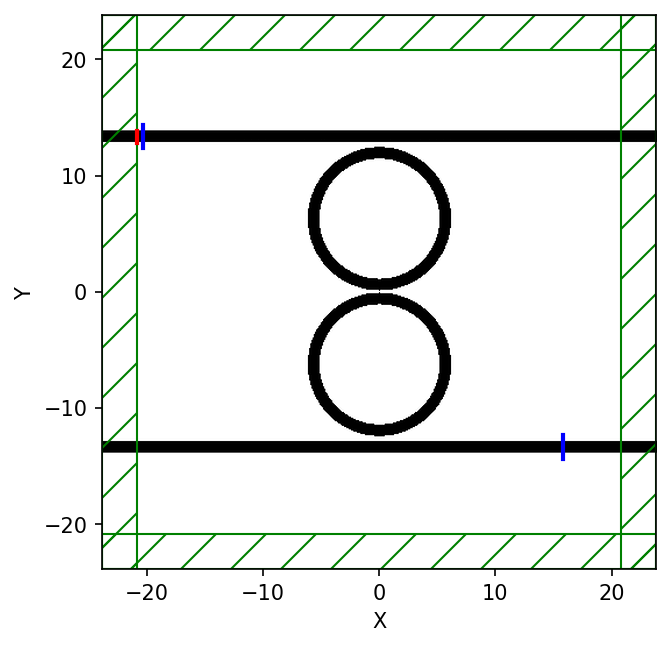

0.5
     block, center = (0,13.44,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


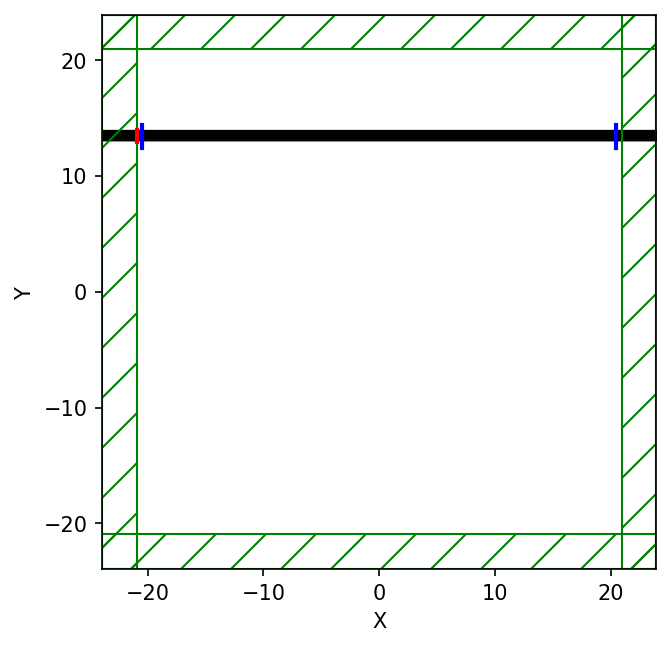

-----------
Initializing structure...
time for choose_chunkdivision = 0.0002214 s
Working in 2D dimensions.
Computational cell is 47.9 x 47.9 x 0 with resolution 10
     block, center = (0,13.44,0)
          size (1e+20,1,1)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
time for set_epsilon = 0.189218 s
-----------


FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 222.3/2500.0 = 8.9% done in 4.0s, 41.0s to go
on time step 4449 (time=222.45), 0.000899166 s/step
Meep progress: 448.6/2500.0 = 17.9% done in 8.0s, 36.6s to go
on time step 8976 (time=448.8), 0.000883632 s/step
Meep progress: 685.4000000000001/2500.0 = 27.4% done in 12.0s, 31.8s to go
on time step 13713 (time=685.65), 0.00084458 s/step
Meep progress: 920.0/2500.0 = 36.8% done in 16.0s, 27.5s to go
on time step 18404 (time=920.2), 0.000852741 s/step
Meep progress: 1155.05/2500.0 = 46.2% done in 20.0s, 23.3s to go
on time step 23108 (time=1155.4), 0.000850561 s/step
Meep progress: 1381.8500000000001/2500.0 = 55.3% done in 24.0s, 19.4s to go
on time step 27644 (time=1382.2), 0.000881996 s/step
Meep progress: 1613.45/2500.0 = 64.5% done in 28.0s, 15.4s to go
on time step 32278 (time=1613.9), 0.00086335 s/step
Meep progress: 1854.7/2500.0 = 74.2% done in 32.0s, 11.1s to go
on time step 37103 (time=1855.15), 0.000829071 s/step
Meep progress: 2065.7000000000003/2500.0 = 82.6% d

run 0 finished at t = 2500.0 (50000 timesteps)
-----------
Initializing structure...
time for choose_chunkdivision = 0.0002471 s
Working in 2D dimensions.
Computational cell is 47.9 x 47.9 x 0 with resolution 10
     block, center = (0,13.44,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,-6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,-6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     bloc

FloatProgress(value=0.0, description='0% done ', max=2500.0)

Meep progress: 224.95000000000002/2500.0 = 9.0% done in 4.0s, 40.5s to go
on time step 4502 (time=225.1), 0.000888633 s/step
Meep progress: 460.25/2500.0 = 18.4% done in 8.0s, 35.5s to go
on time step 9210 (time=460.5), 0.000849758 s/step
Meep progress: 692.5500000000001/2500.0 = 27.7% done in 12.0s, 31.3s to go
on time step 13857 (time=692.85), 0.000860904 s/step
Meep progress: 929.9000000000001/2500.0 = 37.2% done in 16.0s, 27.0s to go
on time step 18602 (time=930.1), 0.000842999 s/step
Meep progress: 1174.6000000000001/2500.0 = 47.0% done in 20.0s, 22.6s to go
on time step 23499 (time=1174.95), 0.00081707 s/step
Meep progress: 1408.45/2500.0 = 56.3% done in 24.0s, 18.6s to go
on time step 28177 (time=1408.85), 0.000855202 s/step
Meep progress: 1653.95/2500.0 = 66.2% done in 28.0s, 14.3s to go
on time step 33088 (time=1654.4), 0.000814543 s/step
Meep progress: 1889.0500000000002/2500.0 = 75.6% done in 32.0s, 10.4s to go
on time step 37789 (time=1889.45), 0.000851017 s/step
Meep progr

run 0 finished at t = 2500.0 (50000 timesteps)
     block, center = (0,13.44,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     cylinder, center = (0,-6.27,0)
          radius 6.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (16,16,16)
     cylinder, center = (0,-6.27,0)
          radius 5.17, height 1e+20, axis (0, 0, 1)
          dielectric constant epsilon diagonal = (2.0736,2.0736,2.0736)
     block, center = (0,-13.44,0)
          size (1e+20,1,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (16,16,16)


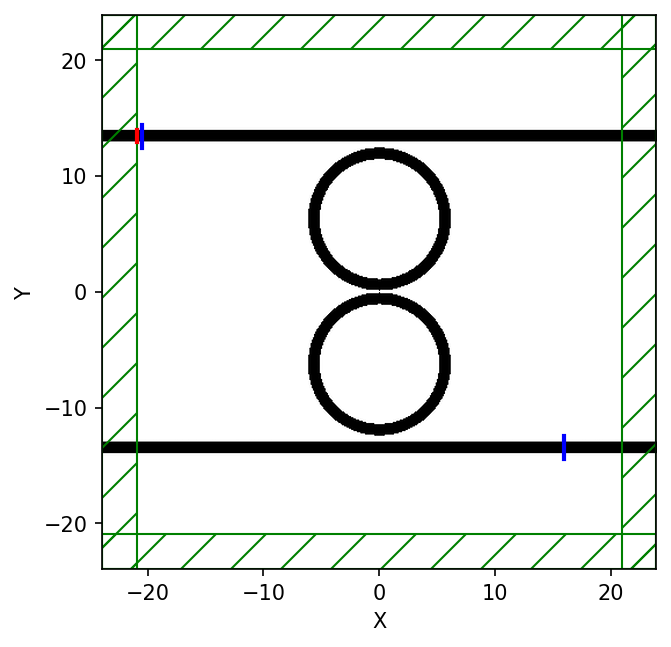

In [4]:
radii = 0 # This parameter was used to vary radii but is not currently used
gaps = 5 # Divide w_unit into this many slcies

wl = [None for j in range(gaps)]
Rs = [None for j in range(gaps)]
Ts = [None for j in range(gaps)]

nfreq = 1000 # Number of frequencies computed in in Fourier Transform

for gap in range(gaps):
    # Controls
    
    radiusControl = 6.17
    gapControl =(gap + 1)/(gaps*2)
    print(gapControl)
    heightSpacing = 10
    widthSpacing = 10
    rOffset = 0.1 + radiusControl 
    
    # Dieletric Geometry
    guideWidth = 1
    ringRadius = radiusControl*guideWidth
    guideRingGap = guideWidth*gapControl
    
    # Borders
    
    borderPadding = 2*thicknessPML
    cellHeight = 2*(rOffset+ringRadius + guideRingGap + guideWidth + heightSpacing)
    cellWidth = 2*(rOffset+ringRadius + guideRingGap + guideWidth + widthSpacing)
    
    cellSize = mp.Vector3(cellWidth, cellHeight)

    # Domain Data
    domain = [0, cellWidth, 0, cellHeight]
    center = mp.Vector3(
        (domain[1] + domain[0]) / 2,
        (domain[3] + domain[2]) / 2,
        )
    cell_size = mp.Vector3(
        domain[1] - domain[0],
        domain[3] - domain[2],
        )

    # Wave Source

    wavelength = 1.55*mediumIndex
    frequencyCenter = 1/wavelength
    bandwidth = 0.05 # 3xWavelength maximum integer before distortion at extremities
    
    sourceX = -(cellWidth)/2 + thicknessPML
    sourceY = rOffset+ringRadius + guideRingGap + guideWidth/2

    # Guide Controls ______________________________________________________________________________________

    const = 0.125

    constGuide = ringRadius + guideWidth/2 + const # For altering only one radius, must swap out in below variables
    
    guideBottom = sourceY

    guideTop = sourceY
    
    sources = [
        mp.Source(
            mp.GaussianSource(frequencyCenter, fwidth=bandwidth),
            component=mp.Ez,
            center=mp.Vector3(sourceX, guideTop, 0),
            size=mp.Vector3(0, guideWidth, 0),
        )
    ]

    # Geometry ____________________________________________________________________________________________

    geometry = [
        mp.Block(
            size=mp.Vector3(inf, guideWidth, 1),
            center=mp.Vector3(0, guideTop, 0),
            material=medium,
        ),
    ]

    # Simulation Setup

    sim = mp.Simulation(
        cell_size=cellSize,
        boundary_layers=pml_layers,
        geometry=geometry,
        sources=sources,
        resolution=10,
        default_material=background
    )

    # Reflected Flux
    reflected = mp.FluxRegion(center=mp.Vector3(sourceX + 0.5, guideTop, 0), 
                             size=mp.Vector3(0, 2*guideWidth, 0)
                            )
    reflectedFourier = sim.add_flux(frequencyCenter, bandwidth, nfreq, reflected)
    
    # Transmitted Flux
    transmitted = mp.FluxRegion(center=mp.Vector3(-sourceX-0.5,guideTop,0),
                                size=mp.Vector3(0,2*guideWidth,0)
                               )
    transmittedFourier = sim.add_flux(frequencyCenter, bandwidth, nfreq, transmitted)
    
    # Display Dielectric
    plt.figure(dpi=150)
    sim.plot2D()
    plt.show()

    # Calculate Flux

    sim.run(until=2500)
    
    straightReflectedData = sim.get_flux_data(reflectedFourier)

    straightTransmittedFlux = mp.get_fluxes(transmittedFourier)

    # Compare Unit against new structure

    sim.reset_meep() #_________________________________________________________________________________________________________________________________
    
    # Geometry
    
    geometry = [
        mp.Block(
            size=mp.Vector3(inf, guideWidth, inf),
            center=mp.Vector3(0, guideTop, 0),
            material=medium,
            ),
        mp.Cylinder(center=mp.Vector3(0, rOffset,0),radius=ringRadius, material=medium),
        mp.Cylinder(center=mp.Vector3(0, rOffset,0),radius=ringRadius-guideWidth, material=background),
        mp.Cylinder(center=mp.Vector3(0, -rOffset,0),radius=ringRadius, material=medium),
        mp.Cylinder(center=mp.Vector3(0, -rOffset,0),radius=ringRadius-guideWidth, material=background),
        mp.Block(
            size=mp.Vector3(inf, guideWidth, inf),
            center=mp.Vector3(0, -guideBottom, 0),
            material=medium
            ),
    ]
    
    sim = mp.Simulation(cell_size=cellSize,
                        boundary_layers=pml_layers,
                        geometry=geometry,
                        sources=sources,
                        resolution=10,
                        default_material=background
                       )
    # Reflected Flux
    reflectedFourier = sim.add_flux(frequencyCenter, bandwidth, nfreq, reflected)
    
    transmitted = mp.FluxRegion(center=mp.Vector3(-sourceX-5,-guideBottom, 0), 
                                size=mp.Vector3(0, 2*guideWidth, 0)
                               )
    transmittedFourier = sim.add_flux(frequencyCenter, bandwidth, nfreq, transmitted)
    
    sim.load_minus_flux_data(reflectedFourier, straightReflectedData)
    
    sim.run(until=2500) # change to "mp.at_every(n, plotEPS), until 2500" to plot the simulation at every n time units. Same goes for the straight waveguide. 
    
    nextReflectedFlux = mp.get_fluxes(reflectedFourier)
    nextTransmittedFlux = mp.get_fluxes(transmittedFourier)
    
    fluxFrequencies = mp.get_flux_freqs(reflectedFourier)
    
    plt.figure(dpi=150)
    sim.plot2D()
    plt.show()

    for i in range(nfreq):
        wl[gap] = np.append(wl[gap], 1 / fluxFrequencies[i])
        Rs[gap] = np.append(Rs[gap], -nextReflectedFlux[i] / straightTransmittedFlux[i])
        Ts[gap] = np.append(Ts[gap], nextTransmittedFlux[i] / straightTransmittedFlux[i])

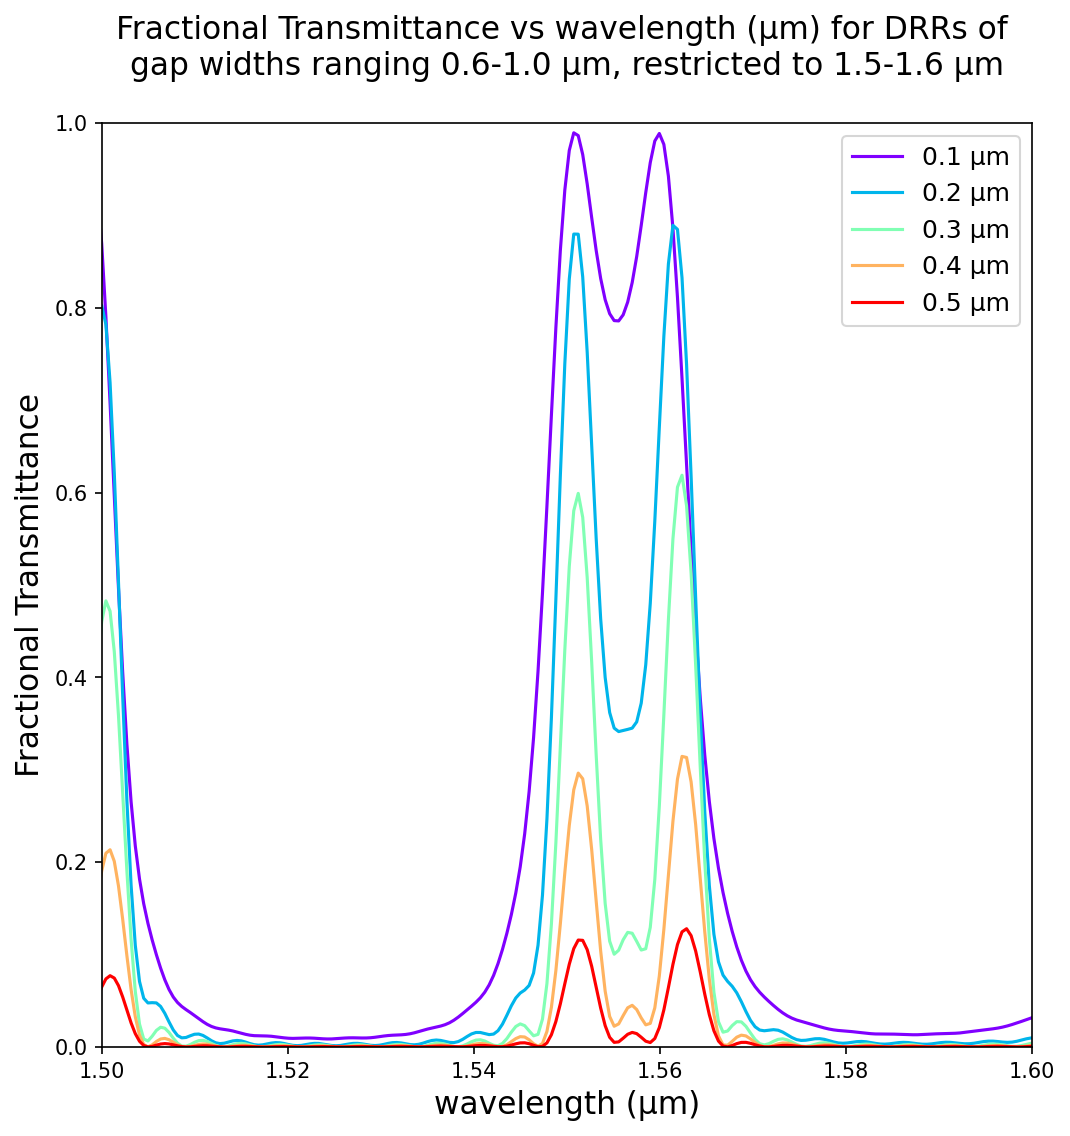

In [5]:
plt.figure(figsize=(8, 8), dpi=150)

color = plt.cm.rainbow(np.linspace(0, 1, gaps))

for gap, c in enumerate(color):
    if mp.am_master():
        x = wl[gap][1:]
        
        x = [i/mediumIndex for i in x]
        
        plt.plot(x, Ts[gap][1:], c=c, label=f"{round((gap + 1)/(gaps*2),3)} μm", markersize=1, linewidth=1.5)
        #plt.plot(x, Rs[gap][1:], c=c, label=f"{round((gap + 1)/(gaps),3)} μm Reflectance" , markersize=0, linewidth=1) - Reflectance, not plotted for clarity
        np.savetxt(f"plot{gap}.csv", (x,Ts[gap][1:]), delimiter=',') # Save CSV

plt.axis([1.5, 1.6, 0, 1])
plt.title("Fractional Transmittance vs wavelength (μm) for DRRs of \ngap widths ranging 0.6-1.0 μm, restricted to 1.5-1.6 μm\n", fontsize=15) # , restricted to 1.5-1.6 μm
plt.xlabel("wavelength (μm)", fontsize=15)
plt.ylabel("Fractional Transmittance", fontsize=15)
plt.legend(loc="best", prop={'size': 12})
plt.savefig("0.1-0.5_1Circle.pdf", bbox_inches='tight', format="pdf") # Save figure, must manually update title or will overwrite. Could easily make automatic like CSV but proved unnecessary in usage.
plt.show()